## **LOAD IMAGES**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#copy zip from drive to colab
!cp /content/drive/MyDrive/covid_classification.zip /content

#unzip
!unzip /content/covid_classification.zip

#remove zipfile after unzip to reduce harddisk space
!rm /content/covid_classification.zip

Archive:  /content/covid_classification.zip
replace covid_classification/Data/COVID-19/COVID-19 (1).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: covid_classification/Data/COVID-19/COVID-19 (1).jpeg  
replace covid_classification/Data/COVID-19/COVID-19 (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: covid_classification/Data/COVID-19/COVID-19 (1).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (1).png  
  inflating: covid_classification/Data/COVID-19/COVID-19 (10).jpeg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (10).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (100).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (101).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (102).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (103).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (104).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (105).jpg  


In [ ]:
# check images in colab
import os

normal_image_names=os.listdir('/content/covid_classification/Data/COVID-19')
covid_image_names=os.listdir('/content/covid_classification/Data/Non-COVID-19')

print(normal_image_names)
print('Number of normal images',len(normal_image_names))
print(covid_image_names)
print('Number of covid images',len(covid_image_names))

['COVID-19 (690).jpg', 'COVID-19 (486).jpg', 'COVID-19 (521).jpg', 'COVID-19 (87).jpg', 'COVID-19 (508).jpg', 'COVID-19 (119).jpg', 'COVID-19 (16).jpeg', 'COVID-19 (142).jpg', 'COVID-19 (307).jpg', 'COVID-19 (857).jpg', 'COVID-19 (125).jpg', 'COVID-19 (707).jpg', 'COVID-19 (491).jpg', 'COVID-19 (827).jpg', 'COVID-19 (578).jpg', 'COVID-19 (406).jpg', 'COVID-19 (209).jpg', 'COVID-19 (13).jpeg', 'COVID-19 (687).jpg', 'COVID-19 (454).jpg', 'COVID-19 (429).jpg', 'COVID-19 (341).jpg', 'COVID-19 (694).jpg', 'COVID-19 (865).jpg', 'COVID-19 (626).jpg', 'COVID-19 (841).jpg', 'COVID-19 (590).jpg', 'COVID-19 (81).jpg', 'COVID-19 (605).jpg', 'COVID-19 (123).jpg', 'COVID-19 (380).jpg', 'COVID-19 (676).jpg', 'COVID-19 (777).jpg', 'COVID-19 (526).jpg', 'COVID-19 (791).jpg', 'COVID-19 (378).jpg', 'COVID-19 (579).jpg', 'COVID-19 (607).jpg', 'COVID-19 (43).jpg', 'COVID-19 (535).jpg', 'COVID-19 (850).jpg', 'COVID-19 (397).jpg', 'COVID-19 (197).jpg', 'COVID-19 (36).jpg', 'COVID-19 (203).jpg', 'COVID-19 (28

# **LOAD LIBRARIES**

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,GlobalAveragePooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import pickle


# **DATA PREPROCESSING**

## **Data Generator**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


dir='/content/covid_classification/Data'
batch_size=32


train_datagen = ImageDataGenerator(
    rotation_range = 30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    dir, # same directory as training data
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1460 images belonging to 2 classes.
Found 364 images belonging to 2 classes.


# **TRANSFER LEARNING**

## **InceptionV3**

87916544/87910968 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
45/45 [==============================] - 30s 569ms/step - loss: 5.7919 - accuracy: 0.4776 - val_loss: 4.8818 - val_accuracy: 0.4460
Epoch 2/100
45/45 [==============================] - 24s 531ms/step - loss: 3.4778 - accuracy: 0.5098 - val_loss: 3.2358 - val_accuracy: 0.5426
Epoch 3/100
45/45 [==============================] - 24s 535ms/step - loss: 2.4053 - accuracy: 0.6254 - val_loss: 2.6396 - val_accuracy: 0.6165
Epoch 4/100
45/45 [==============================] - 24s 532ms/step - loss: 1.8996 - accuracy: 0.6667 - val_loss: 1.6919 - val_accuracy: 0.6847
Epoch 5/100
45/45 [==============================] - 24s 529ms/step - loss: 1.5954 - accuracy: 0.6863 - val_loss: 1.8915 - val_accuracy: 0.6932
Epoch 6/100
45/45 [==============================] - 24s 527ms/step - loss: 1.4425 - accuracy: 0.7143 - val_loss: 1.5639 - val_accuracy: 0.7386
Epoch 7/100
45/45 [==============================] - 24s 525ms/step - loss: 1.4914 - accuracy: 0.7094 - val_loss: 1.6944 - val_accuracy:

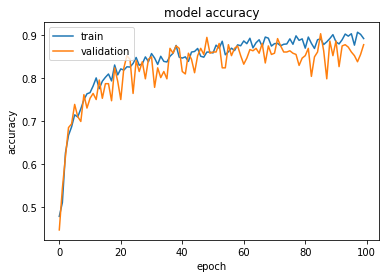

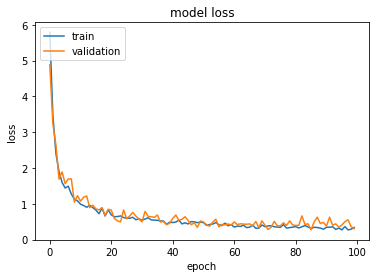

INFO:tensorflow:Assets written to: /content/drive/MyDrive/COVID_classification/InceptionV3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/COVID_classification/InceptionV3/assets


In [ ]:


base_model = tf.keras.applications.InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model 


model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 100)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/COVID_classification/inceptionv3_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/COVID_classification/InceptionV3')

## **Resnet50V2**

94674944/94668760 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
45/45 [==============================] - 38s 734ms/step - loss: 17.3772 - accuracy: 0.5742 - val_loss: 3.4012 - val_accuracy: 0.7159
Epoch 2/100
45/45 [==============================] - 31s 698ms/step - loss: 2.9713 - accuracy: 0.7087 - val_loss: 2.7868 - val_accuracy: 0.7273
Epoch 3/100
45/45 [==============================] - 31s 697ms/step - loss: 2.5980 - accuracy: 0.7220 - val_loss: 2.2671 - val_accuracy: 0.7528
Epoch 4/100
45/45 [==============================] - 31s 693ms/step - loss: 2.3899 - accuracy: 0.7234 - val_loss: 2.7187 - val_accuracy: 0.7500
Epoch 5/100
45/45 [==============================] - 31s 695ms/step - loss: 2.3903 - accuracy: 0.7024 - val_loss: 2.1723 - val_accuracy: 0.7500
Epoch 6/100
45/45 [==============================] - 31s 693ms/step - loss: 1.9282 - accuracy: 0.7339 - val_loss: 1.7268 - val_accuracy: 0.7699
Epoch 7/100
45/45 [==============================] - 31s 697ms/step - loss: 1.6174 - accuracy: 0.7661 - val_loss: 1.2326 - val_accuracy

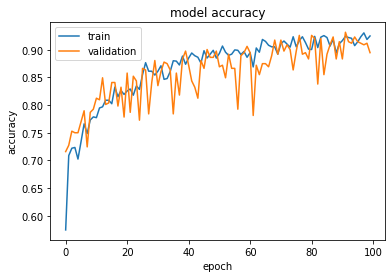

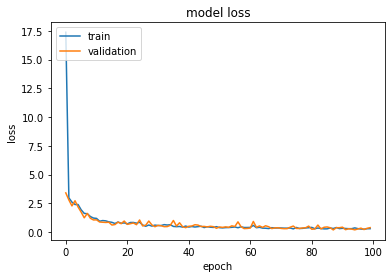

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/COVID_classification/Resnet50V2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/COVID_classification/Resnet50V2/assets


In [ ]:
base_model = tf.keras.applications.ResNet50V2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model 

model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 100)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/COVID_classification/resnet50v2_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/COVID_classification/Resnet50V2')

## **DenseNet121**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
45/45 [==============================] - 62s 584ms/step - loss: 2.9764 - accuracy: 0.3270 - val_loss: 2.8133 - val_accuracy: 0.3068
Epoch 2/100
45/45 [==============================] - 24s 532ms/step - loss: 2.1399 - accuracy: 0.3396 - val_loss: 1.6066 - val_accuracy: 0.4176
Epoch 3/100
45/45 [==============================] - 24s 532ms/step - loss: 1.4344 - accuracy: 0.4209 - val_loss: 1.2664 - val_accuracy: 0.4631
Epoch 4/100
45/45 [==============================] - 24s 531ms/step - loss: 1.0643 - accuracy: 0.5105 - val_loss: 1.0542 - val_accuracy: 0.5170
Epoch 5/100
45/45 [==============================] - 24s 542ms/step - loss: 0.8943 - accuracy: 0.5987 - val_loss: 0.8994 - val_accuracy: 0.6250
Epoch 6/100
45/45 [==============================] - 24s 540ms/step - loss: 0.7662 - accuracy: 0.6541 - val_loss: 0.8476 - val_accuracy: 0.6733
Epoch 7/100
45/45 [==============================] - 24s 537ms/step - loss: 0.6681 - accuracy: 0.6961 - val_loss: 0.7125 - val_accuracy:

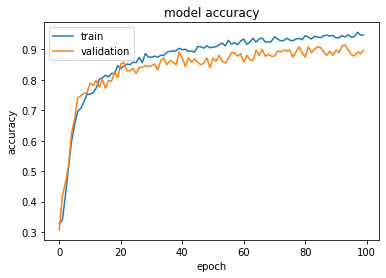

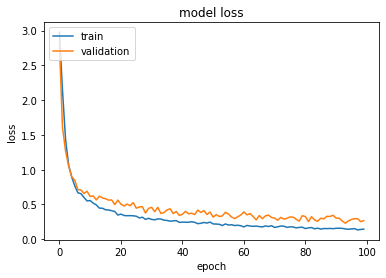

INFO:tensorflow:Assets written to: /content/drive/MyDrive/COVID_classification/DenseNet121/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/COVID_classification/DenseNet121/assets


In [ ]:


base_model = tf.keras.applications.DenseNet121(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False



model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 100)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/COVID_classification/densenet121_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/COVID_classification/DenseNet121')

## **VGG19** 

80142336/80134624 [==============================] - 2s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
45/45 [==============================] - 37s 796ms/step - loss: 4.1834 - accuracy: 0.4769 - val_loss: 3.5073 - val_accuracy: 0.3352
Epoch 2/100
45/45 [==============================] - 34s 748ms/step - loss: 2.4358 - accuracy: 0.4146 - val_loss: 2.8513 - val_accuracy: 0.3409
Epoch 3/100
45/45 [==============================] - 34s 745ms/step - loss: 2.0801 - accuracy: 0.4293 - val_loss: 2.2447 - val_accuracy: 0.3977
Epoch 4/100
45/45 [==============================] - 33s 739ms/step - loss: 1.6396 - accuracy: 0.4853 - val_loss: 1.8318 - val_accuracy: 0.4545
Epoch 5/100
45/45 [==============================] - 33s 739ms/step - loss: 1.4078 - accuracy: 0.5483 - val_loss: 1.8387 - val_accuracy: 0.4773
Epoch 6/100
45/45 [==============================] - 34s 748ms/step - loss: 1.1802 - accuracy: 0.5959 - val_loss: 1.6328 - val_accuracy: 0.4886
Epoch 7/100
45/45 [==============================] - 33s 740ms/step - loss: 1.0840 - accuracy: 0.6254 - val_loss: 1.4665 - val_accuracy:

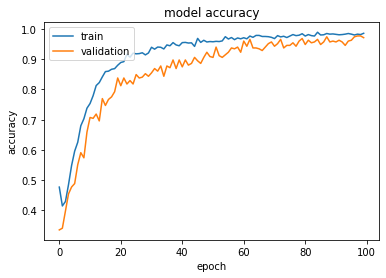

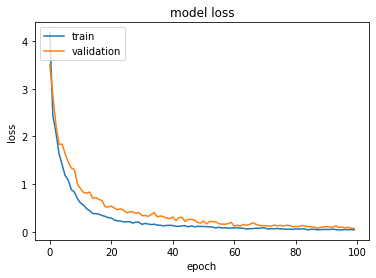

INFO:tensorflow:Assets written to: /content/drive/MyDrive/COVID_classification/VGG19/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/COVID_classification/VGG19/assets


In [ ]:
#choose model to perform transfer learning with
import tensorflow as tf

base_model = tf.keras.applications.VGG19(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model


model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 100)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/COVID_classification/vgg19_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/COVID_classification/VGG19')


## **VGG16**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
45/45 [==============================] - 34s 732ms/step - loss: 0.8843 - accuracy: 0.6814 - val_loss: 0.9563 - val_accuracy: 0.6761
Epoch 2/100
45/45 [==============================] - 33s 726ms/step - loss: 0.7932 - accuracy: 0.6989 - val_loss: 0.7339 - val_accuracy: 0.7244
Epoch 3/100
45/45 [==============================] - 33s 732ms/step - loss: 0.6322 - accuracy: 0.7682 - val_loss: 0.5559 - val_accuracy: 0.7670
Epoch 4/100
45/45 [==============================] - 32s 721ms/step - loss: 0.5076 - accuracy: 0.8032 - val_loss: 0.5383 - val_accuracy: 0.7926
Epoch 5/100
45/45 [==============================] - 32s 722ms/step - loss: 0.4452 - accuracy: 0.8256 - val_loss: 0.4748 - val_accuracy: 0.8210
Epoch 6/100
45/45 [==============================] - 33s 733ms/step - loss: 0.3989 - accuracy: 0.8473 - val_loss: 0.4585 - val_accuracy: 0.8267
Epoch 7/100
45/45 [==============================] - 33s 730ms/step - loss: 0.3555 - accuracy: 0.8775 - val_loss: 0.3841 - val_accuracy:

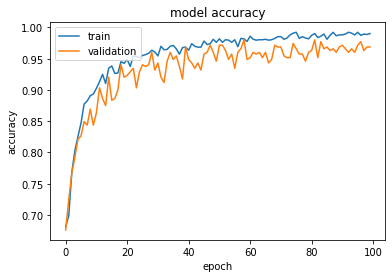

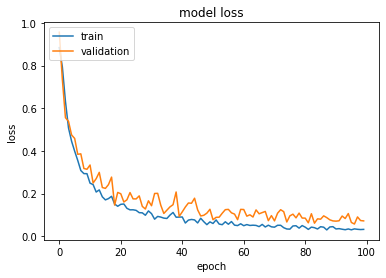

INFO:tensorflow:Assets written to: /content/drive/MyDrive/COVID_classification/VGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/COVID_classification/VGG16/assets


In [ ]:


base_model = tf.keras.applications.VGG16(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model 

model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training



model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 100)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/COVID_classification/vgg16_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/COVID_classification/VGG16')